#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [3]:
first_name= "Amirreza"
last_name= "Jodeiry"
student_number= "401200277"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [5]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.dtype)
print(x_test.dtype)
print(y_train.dtype)
print(y_test.dtype)
# uint8 means there is no Nan.

uint8
uint8
uint8
uint8


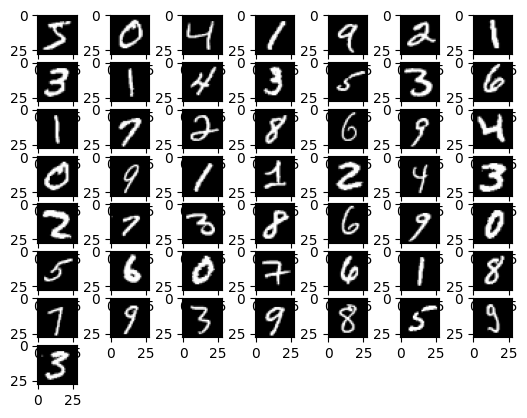

In [ ]:
# here show 50 first of this images

def show_images(num_images,X):
    # TODO (implement show images function)
    #inputs dataset and number of images wants to show
    #output plot images
    for i in range(num_images):
      plt.subplot(8 , 7, i+1)
      plt.imshow(X[i, :, :] , cmap = 'gray')

show_images(50,x_train)

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=5>
 در این بخش ابتدا داده ها تبدیل به وکتور شده سپس نرمالیزه می شوند.
<br>

In [6]:
# TODO: Scale the data set to [0, 1]
# Divide data by maximum value.

# Normalization for input data
x_train_vec = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_vec = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_train_vec_norm = x_train_vec / np.amax(x_train_vec)
x_test_vec_norm = x_test_vec / np.amax(x_test_vec)



print(x_train_vec_norm.shape)
print(x_test_vec_norm.shape)
print(y_test.shape)  # Use y_test_norm, not y_test
print(y_train.shape)  # Use y_train_norm, not y_train


(60000, 784)
(10000, 784)
(10000,)
(60000,)


در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=5>
جهت محاسبه کواریانس از numpy استفاده شده سپس با استفاده از همان پکیج بردار ویژه و مقدار ویژه استخراج می شوند.
<br>

In [7]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
cov_mat = np.cov(x_train_vec_norm , rowvar=False)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)


در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=5>
در این بخش ابتدا مقادیر ویژه سورت می شوند. سپس با توجه به میزان تغییرات درنظر گرفته شده 0.7 تعداد کامپوننت های موردنیاز استخراج میشود. در نهایت نسبت تعداد کامپوننت بدست آمده به کل گزارش می شود.
<br>

In [8]:
explained_variance = 0.8 # you can change this variable to get more components of the dataset.
# TODO
eigen_vals_sorted = np.sort(eigen_vals)[::-1]
sorted_indices = np.argsort(eigen_vals)[::-1]
sorted_eigen_vecs = eigen_vecs[:, sorted_indices]
total_var = np.sum(eigen_vals_sorted)
k = 0
variance_ratio = 0
while variance_ratio <= explained_variance and k < len(eigen_vals):
    variance_ratio += eigen_vals_sorted[k] / total_var
    k += 1

print('desired k is ' + str(k))
reduced_eigen_vals = eigen_vals_sorted[:k]
reduced_eigen_vecs = sorted_eigen_vecs[:, :k]
# calculate the compression_ratio
comp_ratio = k / reduced_eigen_vecs.shape[0]
comp_ratio

desired k is 44


0.05612244897959184

حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=5>
در این بخش ابتدا بردار ویژه کاهش بعدیافته به داده ترین ضرب شده تا روی آن پروجکت شود در نهایت این بردار در ترانهاده بردار ویژه کاهش بعد یافته ضرب می شود. بدین ترتیب با reshape کردن تصویر نهایی کاهش بعد یافته بدست می آید.
<br>

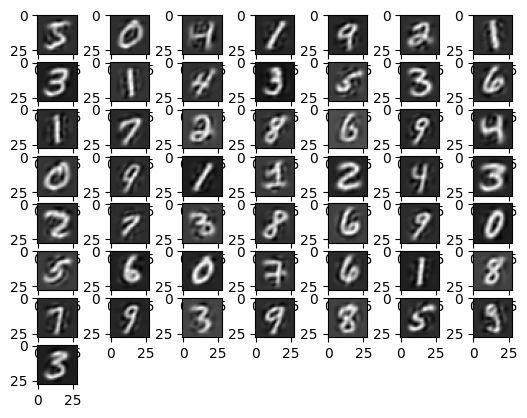

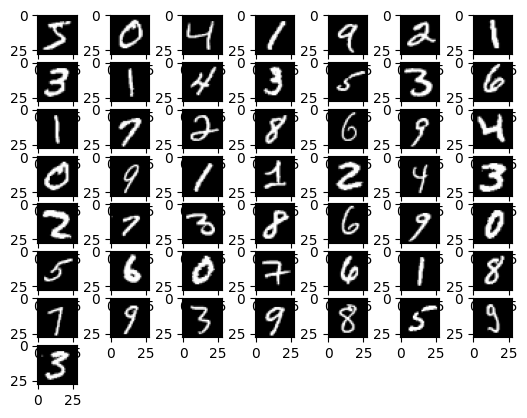

In [88]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
F = np.dot(x_train_vec_norm , reduced_eigen_vecs)

#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
reconstructed_data = np.dot(F, np.transpose(reduced_eigen_vecs))

# Reshape the reconstructed data to the original 28x28 image format
reshaped_images = reconstructed_data.reshape(-1, 28, 28)
reshaped_images.shape

#select on sample and reshape it to a 28 by 28 matrix and plot them as image
#plot the dimentionally reduced data
show_images(50 , reshaped_images)
plt.figure()
show_images(50 , x_train)

## Perform PCA and Gauge Max Accuracy

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=5>
در این بخش بار دیگر این بار با استفاده از کتابخانه آماده عمل کاهش بعد انجام می شود. تا دیتا جهت ورود به مدل لرنینگ آماده شود.
<br>

In [9]:
#complete below function using python PCA function
def do_pca(n_components, data):
  #input number of component and not normalized data set.

  pca_data = PCA(n_components)
  #output is the projected dataset
  reduced_eigen_vecs = pca_data.fit_transform(data)
  return reduced_eigen_vecs

k = 44
A = do_pca(k, x_train.reshape(x_train.shape[0], -1))
B = do_pca(k, x_test.reshape(x_test.shape[0], -1))
A.shape



(60000, 44)

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .


<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=5>
در این مرحله مدل دلخواه با استفاده از کتابخانه آماده سایکیت روی دیتاست ترین اعمال شده و نتایج بدست می آید. دقت موردنظر در نهایت گزارش می شود. <br>

In [11]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

def accuracy_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

def ML_model(X, y, print_output=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Doing KNN
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_model(y_test, y_pred)

    if print_output:
        print(f'Custom Accuracy: {accuracy:.2%}')

    return accuracy
# Concatenate all data and call the function
x = np.concatenate((A, B), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
# I report the accuracy on reduced dimension data with k = 44
# It can be done on whole parts of data(without PCA)
accuracy = ML_model(x, y)
accuracy

Custom Accuracy: 97.00%


0.97

In [12]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
best_accuracy = 0
best_num_components = 0

acc_list, pc_list = [], []
for pc in range(2,101):
    # Perform PCA with the current number of components
    A = do_pca(pc, x_train.reshape(x_train.shape[0], -1))
    B = do_pca(pc, x_test.reshape(x_test.shape[0], -1))
    x = np.concatenate((A, B), axis=0)
    y = np.concatenate((y_train, y_test), axis=0)

    accuracy = ML_model(x, y)

    # Check if this accuracy is the best so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num_components = pc

    # Store accuracy and number of components
    acc_list.append(accuracy)
    pc_list.append(pc)




Custom Accuracy: 37.36%
Custom Accuracy: 43.88%
Custom Accuracy: 58.04%
Custom Accuracy: 69.31%
Custom Accuracy: 78.46%
Custom Accuracy: 83.41%
Custom Accuracy: 87.04%
Custom Accuracy: 88.91%
Custom Accuracy: 90.87%
Custom Accuracy: 92.19%
Custom Accuracy: 93.33%
Custom Accuracy: 94.05%
Custom Accuracy: 94.44%
Custom Accuracy: 94.81%
Custom Accuracy: 95.50%
Custom Accuracy: 95.60%
Custom Accuracy: 95.88%
Custom Accuracy: 96.14%
Custom Accuracy: 96.18%
Custom Accuracy: 96.11%
Custom Accuracy: 96.43%
Custom Accuracy: 96.56%
Custom Accuracy: 96.54%
Custom Accuracy: 96.59%
Custom Accuracy: 96.66%
Custom Accuracy: 96.77%
Custom Accuracy: 96.71%
Custom Accuracy: 96.85%
Custom Accuracy: 96.91%
Custom Accuracy: 96.91%
Custom Accuracy: 96.91%
Custom Accuracy: 97.01%
Custom Accuracy: 96.99%
Custom Accuracy: 96.99%
Custom Accuracy: 96.99%
Custom Accuracy: 96.97%
Custom Accuracy: 96.97%
Custom Accuracy: 97.01%
Custom Accuracy: 96.97%
Custom Accuracy: 97.01%
Custom Accuracy: 97.09%
Custom Accuracy:

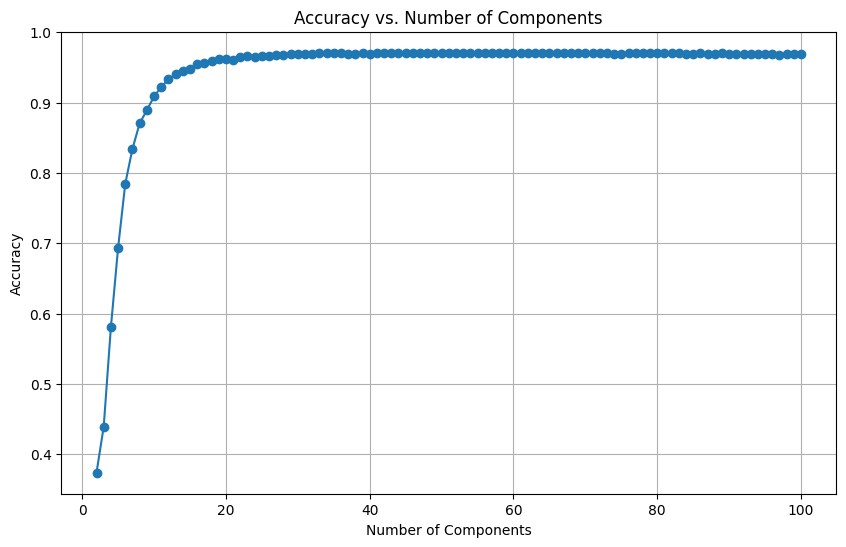

In [13]:
#plot the accuracy based on components.
plt.figure(figsize=(10, 6))
plt.plot(pc_list, acc_list, marker='o')
plt.title('Accuracy vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [14]:
#print the number of components that maximize the accuracy and the max accuracy
print(f"Number of components that maximize accuracy: {best_num_components}")
print(f"Max accuracy: {best_accuracy:.4f}")

Number of components that maximize accuracy: 42
Max accuracy: 0.97
